# **Facial Emotion EDA**

This colab explores the [Kaggle Emotion and identity detection from face images](https://www.kaggle.com/c/facial-keypoints-detector) Dataset. 


# Imports and Co-Lab Set Up

In [ ]:
from google.colab import drive
import tarfile

from IPython.display import display, Image

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import torch

# Part 1: Exploring Facial Emotion Dataset

## Part 1.1: Creating the Emotion-Image Dataset

In [ ]:
# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# since the grayscale pictures come as strings of pixel values, we need to convert
# these strings into a tensor
def get_pixel_tensor(pixel_str):
  return torch.Tensor([float(s) / 255 for s in pixel_str.split(' ')])

# read in the ICML face data as a Pandas dataframe
emotions_df = pd.read_csv('/content/drive/Shared drives/CIS545 Final Project/icml_face_data.csv', skip_blank_lines=False)
emotions_df[' pixels'] = emotions_df[' pixels'].apply(lambda pixel_str: get_pixel_tensor(pixel_str))

In [ ]:
emotions_df

,emotion,Usage,pixels
0,0,Training,"[tensor(0.2745), tensor(0.3137), tensor(0.3216..."
1,0,Training,"[tensor(0.5922), tensor(0.5882), tensor(0.5765..."
2,2,Training,"[tensor(0.9059), tensor(0.8314), tensor(0.6118..."
3,4,Training,"[tensor(0.0941), tensor(0.1255), tensor(0.1412..."
4,6,Training,"[tensor(0.0157), tensor(0.), tensor(0.), tenso..."
...,...,...,...
35882,6,PrivateTest,"[tensor(0.1961), tensor(0.1412), tensor(0.0667..."
35883,3,PrivateTest,"[tensor(0.6980), tensor(0.6824), tensor(0.6745..."
35884,0,PrivateTest,"[tensor(0.0667), tensor(0.0667), tensor(0.0627..."
35885,3,PrivateTest,"[tensor(0.1176), tensor(0.1098), tensor(0.1098..."


## Part 1.2: Visualizing the Data

Here, we will output the first 5 images and the corresponding emotion.

In [ ]:
emotions_map = {
  0: 'Angry', 
  1: 'Disgust', 
  2: 'Fear', 
  3: 'Happy', 
  4: 'Sad', 
  5: 'Surprise', 
  6: 'Neutral'
}

Angry


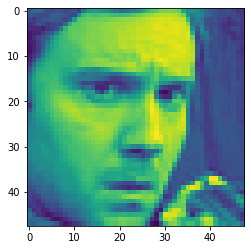

Angry


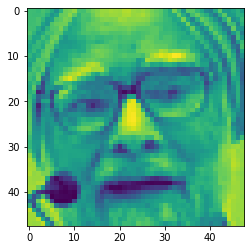

Fear


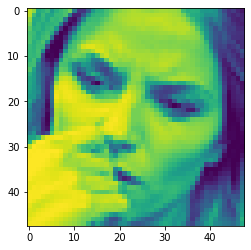

Sad


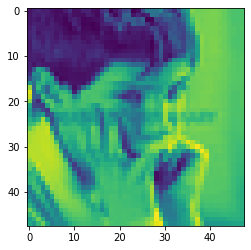

Neutral


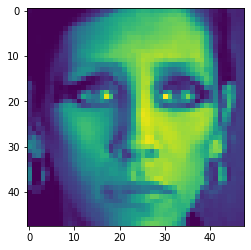

In [ ]:
for i in range(0, 5):
  instance = emotions_df.iloc[i]
  print(emotions_map.get(instance['emotion']))
  plt.imshow(instance[' pixels'].reshape(48, 48))
  plt.show()

Checking the distribution of emotions.

In [ ]:
import numpy as np

emotions_df = emotions_df.sort_values('emotion')
bins = np.arange(0, 6, 1)
ind = np.digitize(emotions_df['emotion'], bins)

emotions_df.groupby(ind)

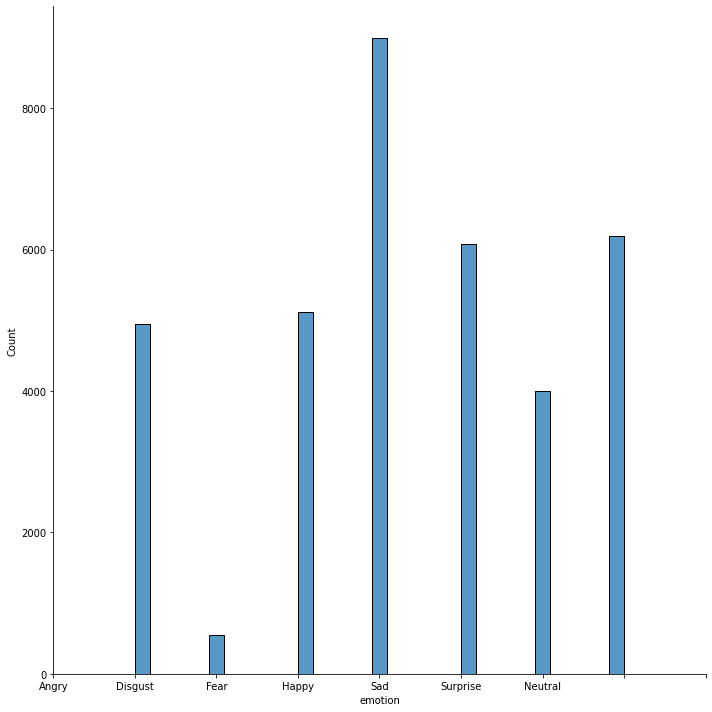

In [ ]:
graph = sns.displot(emotions_df['emotion'], height=10)
graph.set_xticklabels([emotions_map.get(emotion) for emotion in range(7)])
plt.show()